In [18]:
#importando as bibliotecas necessárias para o pipeline de ML
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [23]:
#carregando a base de dados
database = pd.read_csv('segmentacao_clientes.csv')

#visualizando as 10 primeiras instâncias da base de dados
database.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [24]:
#excluindo coluna(s) indesejada(s)
database.drop('ID', axis=1, inplace=True)
database.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
5,0,0,35,1,144848,0,0
6,0,0,53,1,156495,1,1
7,0,0,35,1,193621,2,1
8,0,1,61,2,151591,0,0
9,0,1,28,1,174646,2,0


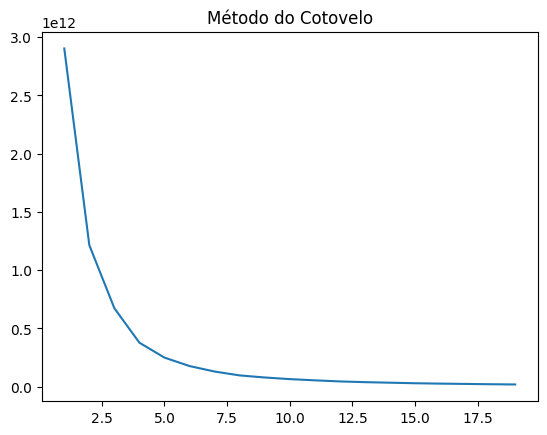

In [32]:
#aplicando o método do cotovelo para encontrar o melhor k
clusters = range(1,20)
inertias = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, n_init = 10, max_iter = 300, random_state = 0)
    model = kmeans.fit(database)
    inertias.append(model.inertia_)

ax = sns.lineplot(x = range(1,20), y = inertias)
ax.set_title('Método do Cotovelo')
plt.show()

In [34]:
#agrupando os clientes usando a técnica K-Means
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(database)
database['cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
#apresentando os centróides dos clusters
kmeans.cluster_centers_

array([[5.44680851e-01, 5.58865248e-01, 3.21276596e+01, 9.36170213e-01,
        1.05336572e+05, 7.40425532e-01, 6.09929078e-01, 1.70212766e-02],
       [2.40000000e-01, 3.86666667e-01, 4.46266667e+01, 1.33333333e+00,
        2.37285187e+05, 1.82666667e+00, 1.52000000e+00, 3.92000000e+00],
       [4.04217926e-01, 4.49912127e-01, 3.85377856e+01, 1.11599297e+00,
        1.30996288e+05, 9.73637961e-01, 9.42003515e-01, 2.89455185e+00],
       [5.47222222e-01, 4.91666667e-01, 3.24750000e+01, 8.83333333e-01,
        7.41174778e+04, 2.22222222e-02, 4.72222222e-02, 2.00000000e+00],
       [2.92096220e-01, 4.70790378e-01, 4.19312715e+01, 1.24742268e+00,
        1.67116790e+05, 1.37457045e+00, 1.30927835e+00, 1.08934708e+00]])

<Axes: xlabel='Age', ylabel='Income'>

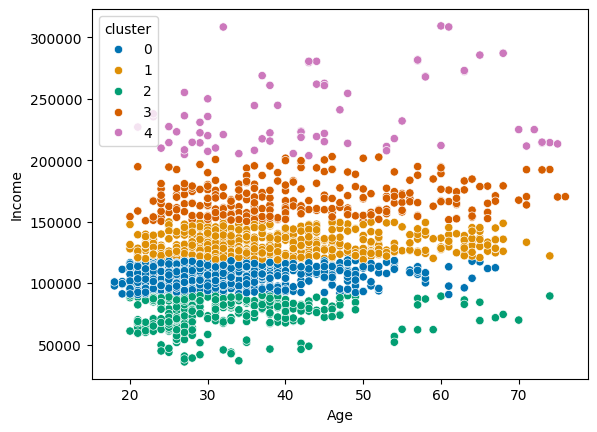

In [16]:
#plotando os clientes com base na idade e na renda
sns.scatterplot(data = database, x = 'Age', y = 'Income', hue = 'cluster', palette = 'colorblind')

In [42]:
#avaliando o desempenho dos clusters
silhouette_avg = silhouette_score(database, database.cluster)

print(f"Silhueta: {silhouette_avg:.2f}")

Silhueta: 0.54


A métrica da silhueta varia de -1 a 1.

Uma pontuação de silhueta mais alta indica clusters mais bem definidos.

Avalie a pontuação com base nas seguintes diretrizes:

0,71 - 1,0: Excelente agrupamento.

0,51 - 0,70: Agrupamento razoável.

0,26 - 0,50: Agrupamento deficiente.

Menos de 0,25: agrupamento muito ruim.